In [111]:
# 1) First: install Java, Spark and and run a local Spark session by just running this on Google Colab:
!apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null   # !apt-get --> install java
!wget -q https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz  # !tar --> like unzip
!pip install -q findspark  # !pip  --> instal a package, we cant import a library without installing it first, most libraries that we used were already installed
# This are INSTALLATION COMMANDS IN LINUX that we run in our collab space, it's similar to downloading programs an installing them on our computers
# installs Apache Spark 3.1.2, Java 8, and Findspark, a library that makes it easy for Python to find Spark


# 2) Second: set the locations where Spark and Java are installed to let know Colab where to find it.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"


# 3) Third: import spark libraries and use them
import findspark
findspark.init("spark-3.5.1-bin-hadoop3") # SPARK_HOME
from pyspark.sql import SparkSession
# Create the session - We need to remember to close it at the end
# The session is basically our connection to Spark layer in the Hadoop ecosystem
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql import Row
from pyspark.sql import functions
from pyspark.sql.types import StructType, StructField, StringType


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,236 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,396 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backport

#Installing and Upgrading Spark, importing Libraries and Mounting Google Drive

In [2]:
# !apt update
# !apt list --upgradable
!apt upgrade -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Calculating upgrade... Done
The following packages were automatically installed and are no longer required:
  linux-headers-5.15.0-112 linux-headers-5.15.0-112-generic
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  linux-headers-5.15.0-113 linux-headers-5.15.0-113-generic
The following packages have been kept back:
  libcudnn8 libcudnn8-dev libnccl-dev libnccl2
The following packages will be upgraded:
  base-files bash binutils binutils-common binutils-x86-64-linux-gnu bsdutils coreutils
  cuda-compat-12-2 cuda-keyring cuda-toolkit-12-config-common cuda-toolkit-config-common dpkg
  dpkg-dev libbinutils libblkid1 libc-bin libctf-nobfd0 libctf0 libdpkg-perl libgnutls30
  libldap-2.5-0 libmount1 libpam-modules libpam-modules-bin libpam-runtime libpam0g libperl5.34
  libprocps8 libsmartcols1 libssl-dev libssl3 libudev1 linux-headers-generic linux-libc-dev l

In [112]:
spark = SparkSession.builder.appName("Basic").getOrCreate()

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
path  = '/content/drive/MyDrive/Colab Notebooks/BDA.2024-Spark/'
!ls '/content/drive/MyDrive/Colab Notebooks/BDA.2024-Spark/'

 11.csv				 NORTHWND_ord.csv	     'Spark Sql - Exercise - Full.ipynb'
 appl_stock.CSV			 NORTHWND_ord_det.csv	     'Spark Sql.ipynb'
 churn_location_and_rating.csv	 people.json		     'Sql - Questions.ipynb'
 churn_location_and_rating.txt	 sales_info.CSV		      walmart_stock.csv
'Country&Rating.csv'		 Spark_Part_C.ipynb
 LearningSpark.ipynb		'Spark Sql - Answers.ipynb'


In [115]:
from pyspark.sql.types import (StructField, IntegerType, StringType, StructType)
from pyspark.sql.functions import when
from pyspark.sql.functions import countDistinct, avg,count,sum,col
from pyspark.sql.functions import format_number
from pyspark.sql.functions import split, col, trim, regexp_replace, length, udf, concat
from pyspark.sql.types import StringType
from pyspark.sql.functions import regexp_replace, initcap

!pip install pycountry
import pycountry

#Fetching and Manipulating the Data

In [116]:
datapath = path + '/churn_location_and_rating.csv'
df = spark.read.csv(datapath,inferSchema=True,header = True)
df.show()

+--------------------------+
|customerID;Location;Rating|
+--------------------------+
|      "id7044;nyc; new ...|
|      "id7045;stockton;...|
|      "id7046;moscow; y...|
|      "id7047;porto; v....|
|      "id7048;farnborou...|
|      "id7049;santa mon...|
|      "id7050;washingto...|
|      "id7051;timmins; ...|
|      "id7052;germantow...|
|      "id7053;albacete;...|
|      "id7054;melbourne...|
|      "id7055;fort brag...|
|      "id7056;barcelona...|
|      "id7057;mediapoli...|
|      "id7058;calgary; ...|
|      "id7059;albuquerq...|
|      "id7060;chesapeak...|
|      "id7061;rio de ja...|
|      "id7062;weston; ;...|
|      "id7063;langhorne...|
+--------------------------+
only showing top 20 rows



In [117]:
df = spark.read.option("delimiter", ";").option("header", True).csv(datapath)
df.show(truncate=True)

+--------------------+------------------+------+
|          customerID|          Location|Rating|
+--------------------+------------------+------+
|"id7044;nyc; new ...|            usa"""|  NULL|
|"id7045;stockton;...|            usa"""|  NULL|
|"id7046;moscow; y...|         russia"""|  NULL|
|"id7047;porto; v....|       portugal"""|  NULL|
|"id7048;farnborou...| united kingdom"""|  NULL|
|"id7049;santa mon...|            usa"""|  NULL|
|"id7050;washingto...|            usa"""|  NULL|
|"id7051;timmins; ...|         canada"""|  NULL|
|"id7052;germantow...|            usa"""|  NULL|
|"id7053;albacete;...|          spain"""|  NULL|
|"id7054;melbourne...|      australia"""|  NULL|
|"id7055;fort brag...|            usa"""|  NULL|
|"id7056;barcelona...|          spain"""|  NULL|
|"id7057;mediapoli...|            usa"""|  NULL|
|"id7058;calgary; ...|         canada"""|  NULL|
|"id7059;albuquerq...|            usa"""|  NULL|
|"id7060;chesapeak...|            usa"""|  NULL|
|"id7061;rio de ja..

In [118]:
from pyspark.sql.functions import split, col, trim, regexp_replace, length, udf, concat
spark = SparkSession.builder.appName("CSV Parsing").getOrCreate()

datapath = datapath
df = spark.read.text(datapath)

df = df.withColumn('value', trim(regexp_replace('value', '["]', '')))

split_cols = split(df['value'], ';')

df = df.select(
    split_cols.getItem(0).alias('customerID'),
    split_cols.getItem(4).alias('Country'),
    split_cols.getItem(2).alias('State'),
    split_cols.getItem(1).alias('City'),
    split_cols.getItem(3).alias('Rating')
)
df = df.filter(df['customerID'] != 'customerID')
df = df.withColumn('Country', regexp_replace(col('Country'), r'[^\sa-zA-Z]', ''))
df = df.withColumn('State', regexp_replace(col('State'), r'[^\sa-zA-Z]', ''))
df = df.withColumn('City', regexp_replace(col('City'), r'[^\sa-zA-Z]', ''))
df.show(truncate=False)

+----------+---------------+----------------+--------------+------+
|customerID|Country        |State           |City          |Rating|
+----------+---------------+----------------+--------------+------+
|id7044    | usa           | new york       |nyc           |9.0   |
|id7045    | usa           | california     |stockton      |5.0   |
|id7046    | russia        | yukon territory|moscow        |5.0   |
|id7047    | portugal      | vngaia         |porto         |9.0   |
|id7048    | united kingdom| hants          |farnborough   |8.0   |
|id7049    | usa           | california     |santa monica  |10.0  |
|id7050    | usa           | dc             |washington    |3.0   |
|id7051    | canada        | ontario        |timmins       |2.0   |
|id7052    | usa           | tennessee      |germantown    |10.0  |
|id7053    | spain         | wisconsin      |albacete      |10.0  |
|id7054    | australia     | victoria       |melbourne     |3.0   |
|id7055    | usa           | california     |for

In [10]:
df.groupBy("country").count().orderBy(col("count").desc()).show(30)

+---------------+-----+
|        country|count|
+---------------+-----+
|            usa|11690|
|         canada| 1771|
|          spain| 1536|
| united kingdom| 1528|
|        germany| 1414|
|          italy| 1273|
|      australia| 1047|
|               |  438|
|       portugal|  407|
|         france|  368|
|    new zealand|  270|
|    netherlands|  249|
|          india|  192|
|         brazil|  160|
|    switzerland|  159|
|         sweden|  145|
|       malaysia|  131|
|          china|  119|
|        austria|  117|
|      argentina|  116|
|        belgium|   85|
|         mexico|   81|
|        finland|   79|
|    philippines|   74|
|      singapore|   74|
|        denmark|   71|
|        ireland|   71|
|       pakistan|   66|
|        romania|   62|
|           iran|   58|
+---------------+-----+
only showing top 30 rows



In [119]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, col, trim, regexp_replace

Assigning UDF's to standardize Countries, and Clean Cities and States

In [120]:
def findCountry(country_name):
    try:
        return pycountry.countries.get(alpha_3=country_name).name
    except:
        return ("Unknown")

def findCountryFuzzy(country_name):
    try:
        result = pycountry.countries.search_fuzzy(country_name)
        if result:
            return result[0].name
        else:
            return "Unknown"
    except:
        return "Unknown"


In [91]:
findCountry("usa")

'United States'

In [92]:
findCountryFuzzy("United")

'United States'

In [15]:
df.createOrReplaceTempView('tmp')

spark.sql('''



Select  Country,count(Country) as cnt from tmp
where lower(country) like "%us%"
group by Country

order by 2 desc


''').show(20, truncate=False)

+------------------+-----+
|Country           |cnt  |
+------------------+-----+
| usa              |11690|
| australia        |1047 |
| austria          |117  |
| russia           |27   |
| cyprus           |3    |
| euskal herria    |2    |
| belarus          |2    |
| us of a          |1    |
| us virgin islands|1    |
+------------------+-----+



In [121]:
findCountryUDF = udf(lambda x:findCountryFuzzy(x),StringType())

In [122]:
from pyspark.sql.functions import regexp_replace, initcap

df = df.withColumn('City', initcap(regexp_replace(col('City'), r'[^\w\s]', '')))
df = df.withColumn('State', initcap(regexp_replace(col('State'), r'[^\w\s]', '')))
df = df.withColumn('Country', regexp_replace(col('Country'), r'[^\w\s]', ''))

In [123]:
df = df.select(
    col("customerID"),
    col("Country"),
    col("City"),
    col("State"),
    col("Rating"),
    when((col("Country")!="") & (findCountryUDF(col("Country")) != "Unknown"),
          findCountryUDF(col("Country"))).otherwise(
        when((col("City").isNotNull()) & (findCountryUDF(col("City")) != "Unknown"),
              findCountryUDF(col("City"))).otherwise(
            when((col("State").isNotNull()) & (findCountryUDF(col("State")) != "Unknown"),
                  findCountryUDF(col("State"))).otherwise("Unknown")
        )
    ).alias("CountryNew")
)

In [124]:
df = df.withColumn('CountryNew', when((trim(col('Country')) == "") & (col('CountryNew') == "United Kingdom"), "Unknown").otherwise(col('CountryNew')))
df = df.withColumn('City', when((trim(col('City')) == "Na") | (trim(col('City')) == ""), "Unknown").otherwise(col('City')))
df = df.withColumn('State', when((trim(col('State')) == "Na") | (trim(col('State')) == ""), "Unknown").otherwise(col('State')))

Showing the Number of Uknownes after the first manipulation

In [21]:
originalstatus = df.withColumn("Category",
    when(col("CountryNew") == "Unknown", "Unknown")
    .otherwise("Known")
)


originalstatus = originalstatus.groupBy("Category")  \
    .agg(count("Country").alias("cnt")) \
    .orderBy(col("cnt").desc())  # Order by count descending

originalstatus.show(100)

+--------+-----+
|Category|  cnt|
+--------+-----+
|   Known|24583|
| Unknown|  275|
+--------+-----+



In [22]:
df.createOrReplaceTempView('df')

In [23]:
df.show()

+----------+---------------+--------------+----------------+------+------------------+
|customerID|        Country|          City|           State|Rating|        CountryNew|
+----------+---------------+--------------+----------------+------+------------------+
|    id7044|            usa|           Nyc|        New York|   9.0|     United States|
|    id7045|            usa|      Stockton|      California|   5.0|     United States|
|    id7046|         russia|        Moscow| Yukon Territory|   5.0|Russian Federation|
|    id7047|       portugal|         Porto|          Vngaia|   9.0|          Portugal|
|    id7048| united kingdom|   Farnborough|           Hants|   8.0|    United Kingdom|
|    id7049|            usa|  Santa Monica|      California|  10.0|     United States|
|    id7050|            usa|    Washington|              Dc|   3.0|     United States|
|    id7051|         canada|       Timmins|         Ontario|   2.0|            Canada|
|    id7052|            usa|    Germantown|

In [24]:
df.cache()

DataFrame[customerID: string, Country: string, City: string, State: string, Rating: string, CountryNew: string]

Learning About big bulks of Unknown Countries to standardize

In [25]:
df.createOrReplaceTempView('df')


spark.sql('''


SELECT
Country,
CountryNew,
count(Country) as cnt
FROM df
where CountryNew = 'Unknown'
group by Country,CountryNew
having cnt > 1
order by 3 desc

''').show(20, truncate=False)

+-------+----------+---+
|Country|CountryNew|cnt|
+-------+----------+---+
|       |Unknown   |257|
|       |Unknown   |3  |
| espaa |Unknown   |2  |
+-------+----------+---+



In [26]:
df.filter(col("CountryNew") == "Unknown").show(10000)

+----------+--------------------+--------------------+--------------------+-------+----------+
|customerID|             Country|                City|               State| Rating|CountryNew|
+----------+--------------------+--------------------+--------------------+-------+----------+
|    id7062|                    |              Weston|             Unknown|    3.0|   Unknown|
|    id7134|                    |    Torontonewmarket|             Unknown|    6.0|   Unknown|
|    id7244|                 uae|             Sharjah|             Sharjah|    6.0|   Unknown|
|    id7351|               espaa|               Getxo|     Yukon Territory|   10.0|   Unknown|
|    id7601|                    |             Burnaby|             Unknown|   10.0|   Unknown|
|    id7832|                    |           Pepperell|             Unknown|    6.0|   Unknown|
|    id7906|   somewherein space|               Space|               Space|    6.0|   Unknown|
|    id7972|                    |     King Of Prus

Fixing those groups

In [125]:
df = df.withColumn("Country", regexp_replace(col("Country"), "\\\\", ""))
df = df.withColumn("Country", regexp_replace(col("Country"), "\\.", ""))
df = df.withColumn("Country", regexp_replace(col("Country"), "(?i)turkey", "Türkiye"))
df = df.withColumn("Country", regexp_replace(col("Country"), "espaa", "Spain"))
df = df.withColumn("Country", regexp_replace(col("Country"), "uae", "United Arab Emirates"))
df = df.withColumn("Country", regexp_replace(col("Country"), "(?i)la ", ""))

In [97]:
df.show(10)

+----------+---------------+------------+----------------+------+------------------+
|customerID|        Country|        City|           State|Rating|        CountryNew|
+----------+---------------+------------+----------------+------+------------------+
|    id7044|            usa|         nyc|        new york|   9.0|     United States|
|    id7045|            usa|    stockton|      california|   5.0|     United States|
|    id7046|         russia|      moscow| yukon territory|   5.0|Russian Federation|
|    id7047|       portugal|       porto|          vngaia|   9.0|          Portugal|
|    id7048| united kingdom| farnborough|           hants|   8.0|    United Kingdom|
|    id7049|            usa|santa monica|      california|  10.0|     United States|
|    id7050|            usa|  washington|              dc|   3.0|     United States|
|    id7051|         canada|     timmins|         ontario|   2.0|            Canada|
|    id7052|            usa|  germantown|       tennessee|  10.0|

In [129]:
from pyspark.sql.functions import col, trim, lower
df.filter(lower(trim(col("Country"))) == "usa").show(10)

+----------+-------+------------+-------------+------+-------------+
|customerID|Country|        City|        State|Rating|   CountryNew|
+----------+-------+------------+-------------+------+-------------+
|    id7044|    usa|         Nyc|     New York|   9.0|United States|
|    id7045|    usa|    Stockton|   California|   5.0|United States|
|    id7049|    usa|Santa Monica|   California|  10.0|United States|
|    id7050|    usa|  Washington|           Dc|   3.0|United States|
|    id7052|    usa|  Germantown|    Tennessee|  10.0|United States|
|    id7055|    usa|  Fort Bragg|   California|   6.0|United States|
|    id7057|    usa|  Mediapolis|         Iowa|   5.0|United States|
|    id7059|    usa| Albuquerque|   New Mexico|   9.0|United States|
|    id7060|    usa|  Chesapeake|     Virginia|   6.0|United States|
|    id7063|    usa|   Langhorne| Pennsylvania|   5.0|United States|
+----------+-------+------------+-------------+------+-------------+
only showing top 10 rows



In [127]:
df = df.select(
    col("customerID"),
    col("Country"),
    col("City"),
    col("State"),
    col("Rating"),
    when((col("Country")!="") & (findCountryUDF(col("Country")) != "Unknown"),
          findCountryUDF(col("Country"))).otherwise(
        when((col("City").isNotNull()) & (findCountryUDF(col("City")) != "Unknown"),
              findCountryUDF(col("City"))).otherwise(
            when((col("State").isNotNull()) & (findCountryUDF(col("State")) != "Unknown"),
                  findCountryUDF(col("State"))).otherwise("Unknown")
        )
    ).alias("CountryNew")
)

In [131]:
df.filter(lower(trim(col("Country"))) == "usa").show(10)

+----------+-------+------------+-------------+------+-------------+
|customerID|Country|        City|        State|Rating|   CountryNew|
+----------+-------+------------+-------------+------+-------------+
|    id7044|    usa|         Nyc|     New York|   9.0|United States|
|    id7045|    usa|    Stockton|   California|   5.0|United States|
|    id7049|    usa|Santa Monica|   California|  10.0|United States|
|    id7050|    usa|  Washington|           Dc|   3.0|United States|
|    id7052|    usa|  Germantown|    Tennessee|  10.0|United States|
|    id7055|    usa|  Fort Bragg|   California|   6.0|United States|
|    id7057|    usa|  Mediapolis|         Iowa|   5.0|United States|
|    id7059|    usa| Albuquerque|   New Mexico|   9.0|United States|
|    id7060|    usa|  Chesapeake|     Virginia|   6.0|United States|
|    id7063|    usa|   Langhorne| Pennsylvania|   5.0|United States|
+----------+-------+------------+-------------+------+-------------+
only showing top 10 rows



In [31]:
temp = df

Almost a fifth of the uknowns were fixed as well

In [32]:
temp = temp.withColumn("Category",
    when(col("CountryNew") == "Unknown", "Unknown")
    .otherwise("Known")
)


temp = temp.groupBy("Category")  \
    .agg(count("Country").alias("cnt")) \
    .orderBy(col("cnt").desc())  # Order by count descending

temp.show(100)

+--------+-----+
|Category|  cnt|
+--------+-----+
|   Known|24619|
| Unknown|  239|
+--------+-----+



# Showing our efforts to clean and standardize the data, less than 1% is "Dirty"

> Add blockquote



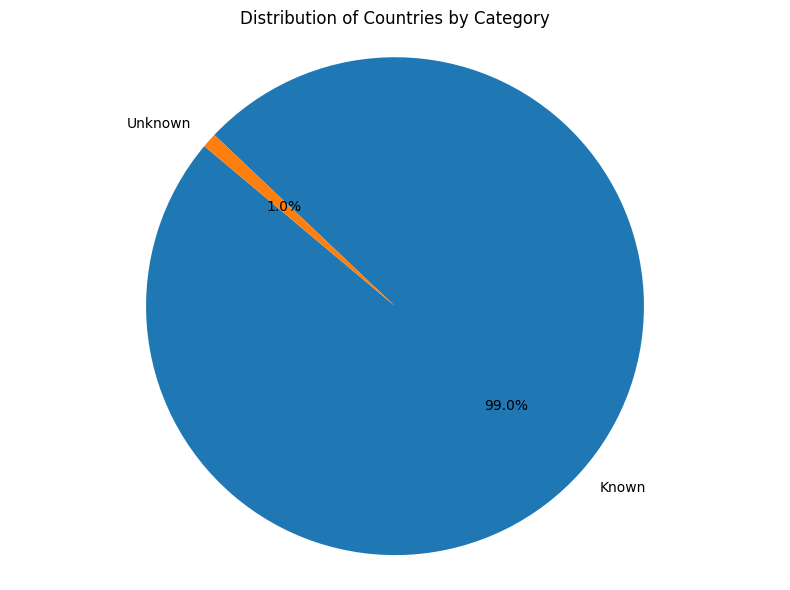

In [50]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when
import matplotlib.pyplot as plt
import pandas as pd

# temp = temp.toPandas()

plt.figure(figsize=(8, 6))
plt.pie(temp['cnt'], labels=temp['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Countries by Category')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [132]:
distinctRatings = df.select("Rating").distinct()

In [133]:
valid_ratings = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

# Filter rows where Rating is not in the list of valid ratings
invalid_ratings_df = df.filter(~col("Rating").isin(valid_ratings))


# Select and show distinct invalid ratings
invalid_ratings_df.select("Rating").show(10)

# Count the number of rows with invalid ratings
invalid_ratings_count = invalid_ratings_df.count()

print(f"Number of rows with invalid ratings: {invalid_ratings_count}")

+-------+
| Rating|
+-------+
|     10|
|      1|
|      2|
|&#24029|
|      9|
|&#25289|
|      2|
|      1|
|     10|
+-------+

Number of rows with invalid ratings: 9


In [134]:
df = df.filter(col("Rating").isin(valid_ratings))

In [135]:
df.select("Rating").distinct().show(20)

+------+
|Rating|
+------+
|   1.0|
|   9.0|
|  10.0|
|   5.0|
|   6.0|
|   4.0|
|   7.0|
|   2.0|
|   8.0|
|   3.0|
+------+



In [136]:
df.show(10)

+----------+---------------+------------+----------------+------+------------------+
|customerID|        Country|        City|           State|Rating|        CountryNew|
+----------+---------------+------------+----------------+------+------------------+
|    id7044|            usa|         Nyc|        New York|   9.0|     United States|
|    id7045|            usa|    Stockton|      California|   5.0|     United States|
|    id7046|         russia|      Moscow| Yukon Territory|   5.0|Russian Federation|
|    id7047|       portugal|       Porto|          Vngaia|   9.0|          Portugal|
|    id7048| united kingdom| Farnborough|           Hants|   8.0|    United Kingdom|
|    id7049|            usa|Santa Monica|      California|  10.0|     United States|
|    id7050|            usa|  Washington|              Dc|   3.0|     United States|
|    id7051|         canada|     Timmins|         Ontario|   2.0|            Canada|
|    id7052|            usa|  Germantown|       Tennessee|  10.0|

#Constructing a UDF to accepct a CSV, manipulate and extract the data localy

In [139]:
output_path = "/content/drive/MyDrive/Colab Notebooks/BDA.2024-Spark/Country&Rating.csv"
def CleanGEO(datapath):
    try:
        # Read CSV file
        x = spark.read.csv(datapath, inferSchema=True, header=True)

        # Apply delimiter and header options
        x = spark.read.option("delimiter", ";").option("header", True).csv(datapath)
        x = spark.read.text(datapath)

        # Clean the 'value' column
        x = x.withColumn('value', trim(regexp_replace('value', '["]', '')))

        # Split the 'value' column into separate columns
        split_cols = split(x['value'], ';')
        x = x.select(
            split_cols.getItem(0).alias('customerID'),
            split_cols.getItem(4).alias('Country'),
            split_cols.getItem(2).alias('State'),
            split_cols.getItem(1).alias('City'),
            split_cols.getItem(3).alias('Rating')
        )


        # Remove header row if present, removing symbals
        x = x.filter(x['customerID'] != 'customerID')
        x = x.withColumn('Country', regexp_replace(col('Country'), r'[^\sa-zA-Z]', ''))
        x = x.withColumn('State', regexp_replace(col('State'), r'[^\sa-zA-Z]', ''))
        x = x.withColumn('City', regexp_replace(col('City'), r'[^\sa-zA-Z]', ''))

        # Clean 'City' 'Country' and 'State' columns
        x = x.withColumn('City',  initcap(regexp_replace(col('City'), r'[^\w\s]', '')))
        x = x.withColumn('State', initcap(regexp_replace(col('State'), r'[^\w\s]', '')))
        x = x.withColumn('Country', regexp_replace('Country', r'[^\w\s]', ''))

        # Standardize 'Country' column
        x = x.withColumn("Country", regexp_replace(col("Country"), "\\\\", ""))
        x = x.withColumn("Country", regexp_replace(col("Country"), "\\.", ""))
        x = x.withColumn("Country", regexp_replace(col("Country"), "(?i)turkey", "Türkiye"))
        x = x.withColumn("Country", regexp_replace(col("Country"), "espaa", "Spain"))
        x = x.withColumn("Country", regexp_replace(col("Country"), "uae", "United Arab Emirates"))
        x = x.withColumn("Country", regexp_replace(col("Country"), "(?i)la ", ""))

        # Derive 'CountryNew' column using the UDF
        x = x.select(
            col("customerID"),
            col("Country"),
            col("City"),
            col("State"),
            col("Rating"),
            when((col("Country")!="") & (findCountryUDF(col("Country")) != "Unknown"),
                  findCountryUDF(col("Country"))).otherwise(
                when((col("City").isNotNull()) & (findCountryUDF(col("City")) != "Unknown"),
                      findCountryUDF(col("City"))).otherwise(
                    when((col("State").isNotNull()) & (findCountryUDF(col("State")) != "Unknown"),
                          findCountryUDF(col("State"))).otherwise("Unknown")
                )
            ).alias("CountryNew")
        )

        x = x.withColumn('CountryNew', when((trim(col('Country')) == "") & (col('CountryNew') == "United Kingdom"), "Unknown").otherwise(col('CountryNew')))
        x = x.withColumn('City', when((trim(col('City')) == "na") | (trim(col('City')) == ""), "Unknown").otherwise(col('City')))
        x = x.withColumn('City', when((trim(col('City')) == "Na") | (trim(col('City')) == ""), "Unknown").otherwise(col('City')))
        x = x.withColumn('State', when((trim(col('State')) == "na") | (trim(col('State')) == ""), "Unknown").otherwise(col('State')))
        x = x.withColumn('State', when((trim(col('State')) == "Na") | (trim(col('State')) == ""), "Unknown").otherwise(col('State')))


        # Remove the original 'Country' column
        x = x.drop('Country')

        # Rename 'CountryNew' to 'Country'
        x = x.withColumnRenamed('CountryNew', 'Country')

        # Reorder columns to place 'Country' as the second column
        x = x.select("customerID", "Country", "City", "State", "Rating")

        # Remove duplicate rows
        x = x.dropDuplicates()

        # Removes Rows with Invalid Ratings
        valid_ratings = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
        x = x.filter(col("Rating").isin(valid_ratings))

        # Show the first 5 rows
        x.show(5)

        # Export the cleaned DataFrame to CSV
        x.coalesce(1).write.mode('overwrite').csv(output_path, header=True)

        return x

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [140]:
CleanGEO(datapath)

+----------+-------------+------------+-----------------+------+
|customerID|      Country|        City|            State|Rating|
+----------+-------------+------------+-----------------+------+
|    id7116|United States|  Wentzville|         Missouri|   6.0|
|    id7216|United States|        Ames|             Iowa|   5.0|
|    id7258|       Canada|Port Alberni| British Columbia|   8.0|
|    id7354|  Netherlands|  Ridderkerk|          Unknown|   4.0|
|    id7634|United States| Miami Beach|          Florida|   6.0|
+----------+-------------+------------+-----------------+------+
only showing top 5 rows



DataFrame[customerID: string, Country: string, City: string, State: string, Rating: string]